In [5]:
import pickle
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [18]:
repo_dir = "/ssd/users/wergillius/Project/5UTR/"

In [12]:
with open("/data/users/wergillius/UTR_VAE/Alex_framepool/data_dict.pkl", 'rb') as handle:
        data_dict = pickle.load(handle)

In [13]:
for key in data_dict:
    print("{} :{}".format(key,len(data_dict[key])))

mpra :980244
snv :1584
ptr :11575
wilhelm :5293
andreev :8003
pcr3 :7672
eichhorn :8956
doudna :25831
varlen_mpra :102214


In [14]:
doudna_len = data_dict['doudna']['utr'].apply(len)

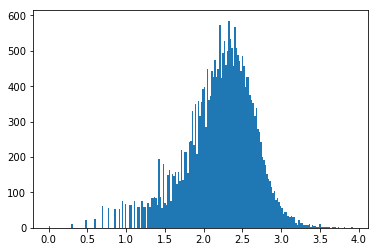

In [17]:
plt.hist(np.log10(doudna_len), bins=200);

# test set is the same

In [25]:
their_testset = data_dict['mpra'].query("(set == 'test') & (library == 'egfp_unmod_1')")

In [26]:
testset_csv = "/data/users/wergillius/UTR_VAE/multi_task/ds4rl_seperate/unmod1_test.csv"
our_test_set = pd.read_csv(testset_csv)

In [28]:
overlap = np.intersect1d(our_test_set['utr'].values, their_testset['utr'].values)

In [29]:
len(overlap)

20000

# V len test set

In [30]:
vlentest_csv_path = "/data/users/wergillius/UTR_VAE/multi_task/ds4rl_seperate/vleng_test.csv"
vlentest_csv = pd.read_csv(vlentest_csv_path) 

In [35]:
vlentest_csv

,utr,set,0,1,2,3,4,5,6,7,...,r13,utr_len,r_sum,blur_rl,blur_rl_scaled,utr100,rng,MFE,scaled_mfe,task
0,CCTTCAATGATTACCTCTATCCCCA,random,291,448,539,529,527,338,170,231,...,0.0,25,0.934234,2.685273,-0.574405,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,"(24, 44]",0.000000,1.375922,2
1,TACGTTTTGACCTTCGTTCATTTTG,random,210,177,181,200,421,478,297,516,...,0.0,25,0.943615,3.212196,0.238212,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,"(24, 44]",0.000000,1.375922,2
2,CCAAGAAAGGCTCCACTATATCCCC,random,204,184,193,197,406,442,294,512,...,0.0,25,0.944764,3.223931,0.256309,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,"(24, 44]",0.000000,1.375922,2
3,TCTCCCCCATGCCTTCGCATCCACC,random,445,655,668,463,293,213,79,126,...,0.0,25,0.888023,2.252770,-1.241408,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,"(24, 44]",-2.200000,1.099921,2
4,CAACGGCTTTTGTGCTTCCCTACCC,random,187,160,135,172,353,411,269,502,...,0.0,25,0.945555,3.319411,0.403557,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,"(24, 44]",-2.300000,1.087375,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,AGCAGGTGTTTGCTGAAGACAGCTTACTCAGATCACTACTGCCTGG...,human,3,0,0,2,0,0,0,3,...,0.0,100,0.830783,3.457501,0.616519,AGCAGGTGTTTGCTGAAGACAGCTTACTCAGATCACTACTGCCTGG...,"(84, 104]",-25.500000,-1.823185,2
15196,GATGAATTTTTGGACTGAGTGGCCAAGAAGCTCCATGGTGAGCACT...,human,3,2,3,3,1,0,1,1,...,0.0,100,0.853054,2.388727,-1.031736,GATGAATTTTTGGACTGAGTGGCCAAGAAGCTCCATGGTGAGCACT...,"(84, 104]",-22.799999,-1.484456,2
15197,GGCGGCCTGCTCTCCGACAGAACTTTTCTTCTTGGGTTGAGGAAAA...,human,0,0,0,3,2,3,1,4,...,0.0,100,1.000000,3.402137,0.531137,GGCGGCCTGCTCTCCGACAGAACTTTTCTTCTTGGGTTGAGGAAAA...,"(84, 104]",-37.400002,-3.316102,2
15198,GAGGCCCCGGCACAACTGGCTCTCCCGGGACTCATAATAGGCCCCA...,human,7,5,3,1,0,0,2,1,...,0.0,100,0.667239,1.323509,-2.674508,GAGGCCCCGGCACAACTGGCTCTCCCGGGACTCATAATAGGCCCCA...,"(84, 104]",-41.299999,-3.805377,2


In [31]:
len(vlentest_csv)

15200

In [34]:
data_dict['varlen_mpra'].query("(`set` == 'test') & (`library` == 'random')")

,utr,set,0,1,2,3,4,5,6,7,...,r7,r8,r9,r10,r11,r12,total,rl,len,library
1,TTTCCGCCCTACTATAACGCCCCTGCGATCACAATATCCCCAGCTA...,test,14,25,31,11,7,4,4,1,...,0.005008,0.031425,0.035111,0.013674,0.050645,0.077078,0.000046,3.184826,100,random
2,TGACTTCTCGGAGAGTCGGGAGGATTGGATTGTTGCCGATGCGGAG...,test,7,19,32,14,1,7,4,2,...,0.010197,0.041132,0.040850,0.041762,0.036091,0.117701,0.000045,3.631326,100,random
3,CCCGCCTCCGAATTCGACCCTGGTTTAAATGTCGGACGTACACGAC...,test,2,3,5,8,10,14,5,17,...,0.107835,0.102346,0.082587,0.095255,0.057730,0.073217,0.000036,5.970026,100,random
4,CTCTCTCACCCGCTTCTCGCCTGTCATCCACGCATTATCGCTAATC...,test,8,6,13,8,9,4,7,8,...,0.048225,0.032421,0.066410,0.074065,0.060958,0.162355,0.000038,4.790130,100,random
5,CGTTCAAGCAGACGCGAAGGTATGGTTCTGGGGGGCGGCATTAGGA...,test,10,16,28,16,7,2,1,1,...,0.006063,0.032609,0.024289,0.033109,0.030656,0.069985,0.000038,3.112142,100,random
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100929,TGATGTATCACTTTCTAAAACTACT,test,224,390,372,330,190,125,47,82,...,0.021779,0.030235,0.029792,0.043510,0.042167,0.098442,0.000861,3.583141,25,random
100930,CCAAGACGCCGCAAACCAAAGACCA,test,164,122,129,95,188,217,169,308,...,0.092410,0.076110,0.081131,0.081099,0.077974,0.058874,0.000762,5.634024,25,random
100931,CGTAGTACCGTAAACGAAAACCAGA,test,118,106,57,79,145,203,153,391,...,0.122976,0.103466,0.096387,0.085014,0.097004,0.050018,0.000727,6.224831,25,random
100932,CGATCCACCCGTTAGAGCGATAGCT,test,97,69,72,86,147,235,140,406,...,0.129000,0.112499,0.094509,0.082414,0.089964,0.053382,0.000720,6.275341,25,random


# the prediction

In [32]:
mpra_pred_df = pd.read_csv(os.path.join(repo_dir, "Data/Predictions/mpra_random_prediction.csv"))

optim_pred = mpra_pred_df.query("model == 'Optimus50' & (data == 'Fixed length (50 nt) MPRA')")

np.sum(optim_pred['Observed MRL'].values - our_test_set['rl'].values < 0.01)

20000